In [1]:
import numpy as np
import defs
import appynho

import perfis

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_28D = defs.read_well('../data/7-MP-28D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT'])

In [4]:
#calculating the DRDN log for all wells
# using the function "drdn" in the file "defs"
drdn_28D = defs.drdn(well_28D['RHOB'], well_28D['NPHI'])
well_28D['DRDN'] = drdn_28D

In [5]:
# calculating the lithology curve for all wells, using the DRDN log
# using the function "create_lithology" in the file "defs"
litho_28D = defs.create_lithology(drdn_28D)
well_28D['LITHOLOGY'] = litho_28D

In [6]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00

In [7]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_28D = defs.formation_zone(well_28D, top, base)

In [8]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_28D = defs.separate_lithology(formation_28D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])

In [9]:
# a dictionary where the keys are lithology codes and the values are colors code for each lithology
# its necessary for the lithology plot
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = [litho_types[lith]['COLOR'],lith]

In [10]:
cores[25][0]='#a9a9a9'
cores[49][0]='#ffdb58'

In [11]:
cores[49][0]

'#ffdb58'

In [12]:
separate_28D

{'DEPTH': array([2500.122 , 2500.2744, 2500.4268, ..., 3099.6636, 3099.816 ,
        3099.9684]),
 'GR': array([ 82.9465,  85.1653,  97.942 , ...,  98.4511, 102.3324, 101.9913]),
 'NPHI': array([0.1985, 0.2366, 0.2627, ..., 0.3183, 0.2826, 0.2691]),
 'RHOB': array([2.6524, 2.6342, 2.6136, ..., 2.4002, 2.4042, 2.4056]),
 'DT': array([77.811 , 82.1873, 85.7037, ..., 63.2938, 65.1346, 67.2219]),
 'DRDN': array([4.66466667, 5.57066667, 6.02866667, ..., 3.614     , 2.504     ,
        2.082     ]),
 'LITHOLOGY': array([57., 57., 57., ..., 57., 57., 57.]),
 'SANDSTONE': {'LITHOLOGY': array([nan, nan, nan, ..., nan, nan, nan]),
  'GR': array([nan, nan, nan, ..., nan, nan, nan]),
  'NPHI': array([nan, nan, nan, ..., nan, nan, nan]),
  'RHOB': array([nan, nan, nan, ..., nan, nan, nan]),
  'DT': array([nan, nan, nan, ..., nan, nan, nan])},
 'SLURY': {'LITHOLOGY': array([nan, nan, nan, ..., nan, nan, nan]),
  'GR': array([nan, nan, nan, ..., nan, nan, nan]),
  'NPHI': array([nan, nan, nan, ..., n

In [13]:
for i in range(len(separate_28D['SILTITE']['GR'])):
    if ~np.isnan(separate_28D['SILTITE']['GR'][i]):
        separate_28D['SILTITE']['GR'][i-1] = separate_28D['SILTITE']['GR'][i]
    if ~np.isnan(separate_28D['SLURY']['GR'][i]):
        separate_28D['SLURY']['GR'][i-1] = separate_28D['SLURY']['GR'][i]

In [14]:
usuario_perfis = {
    'comprimento':12,
    'altura':9,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':80,
    'titulo_geral':''
}

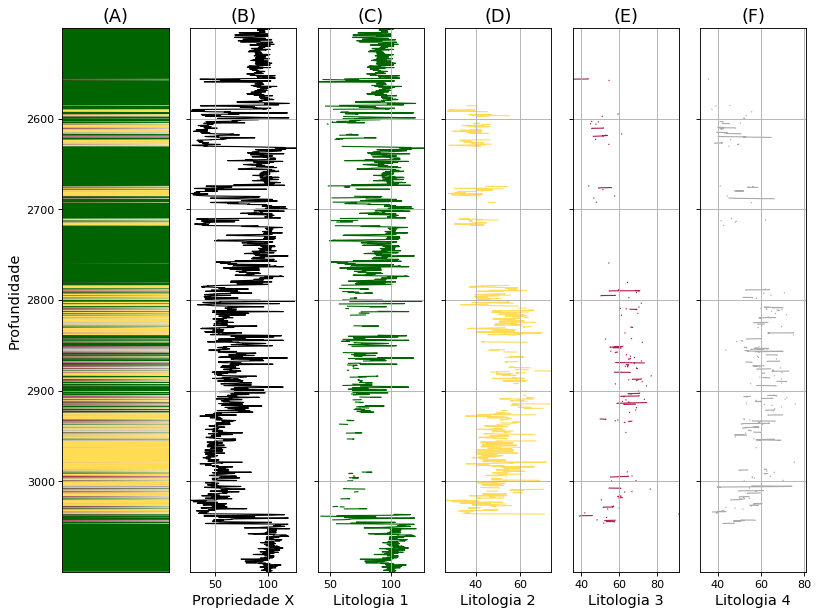

In [15]:
grafico = perfis.plotagem(6, usuario_perfis)

grafico.plot_l(0, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'titulo':'(A)', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(1, separate_28D['GR'], separate_28D['DEPTH'], {'cor':'black', 'descricao_x':'Propriedade X', 'titulo':'(B)','ordem_z':-1})

#grafico.plot_l(2, separate_28D['SHALE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(2, separate_28D['SHALE']['GR'], separate_28D['DEPTH'], {'cor':cores[57][0], 'descricao_x':'Litologia 1', 'titulo':'(C)','ordem_z':-1})

#grafico.plot_l(4, separate_28D['SANDSTONE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(3, separate_28D['SANDSTONE']['GR'], separate_28D['DEPTH'], {'cor':cores[49][0], 'descricao_x':'Litologia 2', 'titulo':'(D)','ordem_z':-1})

#grafico.plot_l(6, separate_28D['SILTITE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(4, separate_28D['SILTITE']['GR'], separate_28D['DEPTH'], {'cor':cores[54][0], 'descricao_x':'Litologia 3', 'titulo':'(E)','ordem_z':-1})

#grafico.plot_l(8, separate_28D['SLURY']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(5, separate_28D['SLURY']['GR'], separate_28D['DEPTH'], {'cor':cores[25][0], 'descricao_x':'Litologia 4', 'titulo':'(F)','ordem_z':-1})

In [16]:
grafico.salvar('../image/separacaolitologia.png')

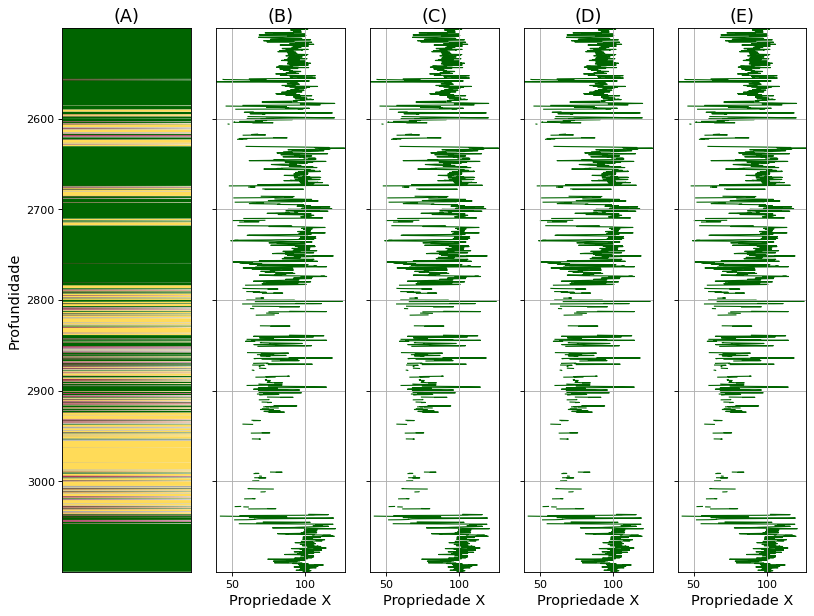

In [17]:
grafico = perfis.plotagem(5, usuario_perfis)

grafico.plot_l(0, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'titulo':'(A)', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(1, separate_28D['SHALE']['GR'], separate_28D['DEPTH'], {'cor':cores[57][0], 'descricao_x':'Propriedade X', 'titulo':'(B)','ordem_z':-1})

#grafico.plot_l(2, separate_28D['SHALE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(2, separate_28D['SHALE']['GR'], separate_28D['DEPTH'], {'cor':cores[57][0], 'descricao_x':'Propriedade X', 'titulo':'(C)','ordem_z':-1})

#grafico.plot_l(4, separate_28D['SANDSTONE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(3, separate_28D['SHALE']['GR'], separate_28D['DEPTH'], {'cor':cores[57][0], 'descricao_x':'Propriedade X', 'titulo':'(D)','ordem_z':-1})

#grafico.plot_l(6, separate_28D['SILTITE']['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'minimo_x': 0, 'maximo_x': 10})
grafico.plot_s(4, separate_28D['SHALE']['GR'], separate_28D['DEPTH'], {'cor':cores[57][0], 'descricao_x':'Propriedade X', 'titulo':'(E)','ordem_z':-1})

In [18]:
grafico.salvar('../image/janelavertical.png', resolucao=300)

In [19]:
step = 100.0
overlap = 0.0

In [20]:
statistic_28D = defs.statistic_lithology(separate_28D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)

In [21]:
statistic_28D

{'DEPTH': array([2500.122 , 2500.2744, 2500.4268, ..., 3099.6636, 3099.816 ,
        3099.9684]),
 'GR': array([ 82.9465,  85.1653,  97.942 , ...,  98.4511, 102.3324, 101.9913]),
 'NPHI': array([0.1985, 0.2366, 0.2627, ..., 0.3183, 0.2826, 0.2691]),
 'RHOB': array([2.6524, 2.6342, 2.6136, ..., 2.4002, 2.4042, 2.4056]),
 'DT': array([77.811 , 82.1873, 85.7037, ..., 63.2938, 65.1346, 67.2219]),
 'DRDN': array([4.66466667, 5.57066667, 6.02866667, ..., 3.614     , 2.504     ,
        2.082     ]),
 'LITHOLOGY': array([57., 57., 57., ..., 57., 57., 57.]),
 'SANDSTONE': {'LITHOLOGY': array([nan, nan, nan, ..., nan, nan, nan]),
  'GR': {'Data': array([nan, nan, nan, ..., nan, nan, nan]),
   'Mean': {'Top': [2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0],
    'Base': [2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0],
    'Value': [37.74879393939394,
     38.38807191780822,
     43.81321844660194,
     54.05767410358566,
     50.92643790697675,
     45.66273483870968]},
   'Std': {'Top': [2500.

In [22]:
def nova_estrutura_de_Dados(dicionario_statistica, lista_dados, cores_informativo):
    
    statistic_data = {}
    for j in lista_dados:
        statistic_data[j] = {}
        dado = {}
        for i in cores_informativo:
            a = dicionario_statistica[ cores_informativo[i][1] ][j]
            l_prof = (np.array(a['Mean']['Top']) + np.array(a['Mean']['Base']))/2.0
            l_mean = a['Mean']['Value']
            l_std = a['Std']['Value']
            dado[i] = [l_prof, l_mean, l_std]
            statistic_data[j][i] = dado[i]
            
    return statistic_data

# -------------------------------------------------------- #

In [23]:
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = [litho_types[lith]['COLOR'],lith]

In [24]:
cores[25][0]='#a9a9a9'
cores[49][0]='#ffdb58'

In [25]:
dados = ['GR','NPHI','RHOB', 'DT']

database_reestruturado = nova_estrutura_de_Dados(statistic_28D, dados, cores)

In [26]:
database_reestruturado

{'GR': {49: [array([2550., 2650., 2750., 2850., 2950., 3050.]),
   [37.74879393939394,
    38.38807191780822,
    43.81321844660194,
    54.05767410358566,
    50.92643790697675,
    45.66273483870968],
   [6.978192664464597,
    5.245542557280303,
    6.682840665766966,
    7.088078496346188,
    6.662304982562667,
    8.031547638877607]],
  25: [array([2550., 2650., 2750., 2850., 2950., 3050.]),
   [46.071839999999995,
    47.17588933333333,
    55.56692413793103,
    61.730371337579626,
    60.35670689655172,
    51.18984],
   [7.618928911669058,
    7.082878018613117,
    8.608650823030612,
    6.153349404647463,
    6.933254246576897,
    7.7651721465882515]],
  57: [array([2550., 2650., 2750., 2850., 2950., 3050.]),
   [90.57420540983607,
    91.76686143187068,
    89.08704943181819,
    82.37267943548387,
    75.04310421052632,
    97.20935132530121],
   [10.712273959457857,
    15.349050030768499,
    14.627327066730984,
    13.782044940043386,
    7.9358097715013285,
    13.78

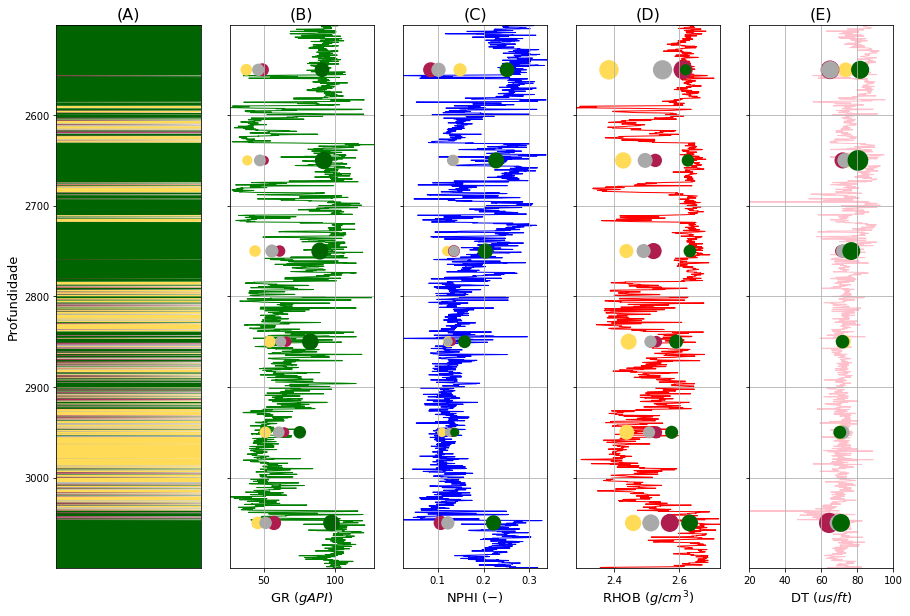

In [27]:
usuario_layout_stats_28D = {
    'comprimento':15,
    'altura':10,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':72,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
    'plot_fundo_transparencia': 0.0
}

grafico = perfis.plotagem(5, usuario_layout_stats_28D)

grafico.plot_l(0, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'titulo':'(A)', 'minimo_x': 0, 'maximo_x': 10})

grafico.plot_stats(1,database_reestruturado['GR'],49,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(1,database_reestruturado['GR'],54,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(1,database_reestruturado['GR'],25,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(1,database_reestruturado['GR'],57,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_s(1, separate_28D['GR'], separate_28D['DEPTH'],{'cor':'g', 'descricao_x':'GR $(gAPI)$', 'titulo':'(B)', 'ordem_z':-1})

grafico.plot_stats(2,database_reestruturado['NPHI'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['NPHI'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['NPHI'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['NPHI'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(2, separate_28D['NPHI'], separate_28D['DEPTH'],{'cor':'b', 'descricao_x':'NPHI $(-)$', 'titulo':'(C)','ordem_z':-1})

grafico.plot_stats(3,database_reestruturado['RHOB'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(3,database_reestruturado['RHOB'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(3,database_reestruturado['RHOB'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(3,database_reestruturado['RHOB'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(3, separate_28D['RHOB'], separate_28D['DEPTH'],{'cor':'r', 'descricao_x':'RHOB $(g/cm^3)$', 'titulo':'(D)'})

grafico.plot_stats(4,database_reestruturado['DT'],49,cores,{'gridagem':False,'ordem_z':1},escala=50)
grafico.plot_stats(4,database_reestruturado['DT'],54,cores,{'gridagem':False,'ordem_z':1},escala=50)
grafico.plot_stats(4,database_reestruturado['DT'],25,cores,{'gridagem':False,'ordem_z':1},escala=50)
grafico.plot_stats(4,database_reestruturado['DT'],57,cores,{'gridagem':False,'ordem_z':1},escala=50)
grafico.plot_s(4, separate_28D['DT'], separate_28D['DEPTH'],{'cor':'pink', 'descricao_x':'DT $(us/ft)$', 'titulo':'(E)', 'minimo_x': 20, 'maximo_x': 100})

#grafico.plot_l(3, separate_55['LITHOLOGY'], separate_55['DEPTH'], cores, {'titulo':'7-MP-55D-BA','curva_limite':separate_55['LITHOLOGY'],'linha_espessura':0.1})

In [28]:
grafico.salvar('../image/bancodedados.png')